## INTRODUCTION TO PROJECT DATA

This data introduction notebook is provided to demonstrate how to load the project data into Pandas DataFrames, and produce some basic visualisation of the data within this Azure ML environment.

In order to run this notebook and to conduct your analysis, please ensure that a compute instance is running (**not** the Serverless Spark Compute option), and that "Python 3.10 - SDK V2" is choosen as the Python version. These options are chosen from the dropdown above.

#### TOP TIP
If a cell is "Queued" for a long time, interrupt the kernel by clicking on the icon to the left of the cell and then try running the cell again. It will often start computing quickly on the second occasion.

## Load the Data

First we load the data. 
These are located in the "data asset".

The available files are,

1. **Radar data**: Aircraft location as well as other aircraft data (e.g. speed), for aircraft near Manchester airport in 2021, in a file called radar_manchester_2021.csv.gz
2. **Flight Plan data**: Contains data about the route each aircraft is planning to take, such as the origin and destination airports, in a file called flight_plan_manchester_2021.csv.gz
3. **Meterological data**: Weather data stored in a file called all_met.csv

Each file is loaded into a Pandas dataframe below using a long file path to load each file from the data asset.

In [1]:
# This cell can take up to 2 minutes
# YOU MAY NEED TO FOLLOW THE AUTHENTICATION STEPS WHICH WILL BE PRINTED BELOW THIS CELL, THE FIRST TIME YOU USE IT

import pandas as pd

# load radar data into Pandas dataframe
print("Loading en-route radar")
path_rad = "azureml://subscriptions/29a4a940-c064-43b4-97f4-2255f790b71f/resourcegroups/rg-pprod-ml-qm-student-project-group-2/workspaces/qm_student_project_group_2/datastores/workspaceblobstore/paths/UI/2025-10-07_152718_UTC/radar_manchester_2021.csv.gz"
df_rad = pd.read_csv(path_rad)

# load flight plan data into Pandas dataframe
print("Loading flight plans")
path_fl = "azureml://subscriptions/29a4a940-c064-43b4-97f4-2255f790b71f/resourcegroups/rg-pprod-ml-qm-student-project-group-2/workspaces/qm_student_project_group_2/datastores/workspaceblobstore/paths/UI/2025-10-07_152649_UTC/flight_plan_manchester_2021.csv.gz"
df_fl = pd.read_csv(path_fl)

# load meterological (weather) data into Pandas dataframe
print("Loading weather data")
path_met = "azureml://subscriptions/29a4a940-c064-43b4-97f4-2255f790b71f/resourcegroups/rg-pprod-ml-qm-student-project-group-2/workspaces/qm_student_project_group_2/datastores/workspaceblobstore/paths/UI/2025-10-07_153116_UTC/all_met.csv"
df_met = pd.read_csv(path_met)

# load full ADS-B data
print("Loading full ADS-B data")
path_adsb_full = "azureml://subscriptions/29a4a940-c064-43b4-97f4-2255f790b71f/resourcegroups/rg-pprod-ml-qm-student-project-group-2/workspaces/qm_student_project_group_2/datastores/workspaceblobstore/paths/UI/2025-10-07_152622_UTC/2021_all_manchester_data_ADSB.csv.gz"
df_adsb_full = pd.read_csv(path_adsb_full)

Loading en-route radar


/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/mlflow/__init__.py:41: UserWarning: Versions of mlflow (3.1.1) and mlflow-skinny (2.22.1) are different. This may lead to unexpected behavior. Please install the same version of both packages.
  mlflow.mismatch._check_version_mismatch()
/tmp/ipykernel_3076/2482406827.py:19: DtypeWarning: Columns (25,26,27,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df_met = pd.read_csv(path_met)


## Radar data
The radar data contains 6 second updates of each aircraft position, heading and rate of climb/descent.

Allows plotting of flights on a map.

Also contains the _**ufid**_ field, allowing merging with the other data files.

Again, lets show the first 8 rows of data

In [2]:
# this line ensures we display all columns, not just a subset
pd.set_option('display.max_columns', None)

df_rad.head 

<bound method NDFrame.head of         Unnamed: 0  system_area_code  system_identification_code  \
0              429                52                         252   
1              459                52                         252   
2              491                52                         252   
3              520                52                         252   
4              551                52                         252   
...            ...               ...                         ...   
942908     3124753                52                         252   
942909     3124826                52                         252   
942910     3124901                52                         252   
942911     3124978                52                         252   
942912     3125058                52                         252   

        latitude_wgs84  longitude_wgs84  x_position_cartesian_m  \
0             53.33666         -2.21424               -116780.0   
1             53.33



Below is a description of the radar columns.


| **Column** | **Description** |
|--|--|
| system_area_code | System Area Code |
| system_identification_code | System Identification Code |
| latitude_wgs84 | latitude in degrees in wgs84 coordinate system |
| longitude_wgs84 | longitude in degrees in wgs84 coordinate system |
| x_position_cartesian_m | x distance from origin (in north sea) in Euclidean projection |
| y_position_cartesian_m | y distance from origin (in north sea) in Euclidean projection |
| x_velocity_cartesian_mps | x velocity in Euclidean projection in metres per second |
| y_velocity_cartesian_mps | y velocity in Euclidean projection in metres per second |
| calc_ground_speed_kt | calculated ground speed in knots |
| mode_3a_code | Mode-3/A code ("squawk code") |
| mode_3a_code_validated | Has Mode-3/A code has been validated: 0 = validated, 1 = not-validated |
| mode_3a_code_garbled | Has Mode-3/A code has been garbled: 0 = Default, 1 = Garbled|
| mode_3a_changed | Has Mode-3/A code changed: 01= No-change, 1=Changed|
| mode_s_hex | Mode S hex code |
| callsign_from_aircraft | Aircraft designator over radion transmission from aircraft system |
| magnetic_heading_deg | Magnetic heading in degrees |
| selected_fl | Selected flight level from the aircraft altitude control panel |
| manage_vertical_mode | Manage Vertical Mode: 0=not-active, 1=active |
| altitude_hold | Altitude Hold: 0=not-active, 1=active |
| approach_mode | Approach Mode: 0=not-active, 1=active |
| flight_status | Flight Status: (for Mode S): 0 = No alert, no SPI, aircraft, airborne: 1 = No alert, no SPI, aircraft on ground, 2 =  Alert, no SPI, aircraft airborne: 3 = Alert, no SPI, aircraft on ground : 4 = Alert, SPI, aircraft airborne or on ground: 5 = No alert, SPI, aircraft airborne or on ground : 6 = Not defined: 7 = Unknown or not yet extracted |
| barometric_vert_rate_fpm | Barometric vertical rate in feet per minute |
| target_identification | Target identification. Defines target identification when flight plan is available or the registration marking when no flight plan is available |
| track_angle_rate_deg_s | Track angle rate in degrees per second |
| track_angle_deg | Track angle in degrees |
| ground_speed_knots | Ground speed in knots, referenced in WGS84 |
| ias | Indicated air speed in knots |
| mach | Mach number |
| barometric_pressure_setting | The barometric pressure setting of the aircraft minus 800 mb, units is mb |
| track_number | Identification of a track |
| track_type | TODO |
| psr_age_s | Age of the last primary detection used to update the track |
| ssr_age_s | Age of the last secondary detection used to update the track |
| mode_s_age_s | Age of the last Mode S detection used to update the track |
| mode_c_age_s | Age in seconds of last credible mode C used to update the track |
| mode_3a_age_s | Age in seconds of last credible mode 3/a code used to update track |
| fl_measured | Last valid, credible measured flight level. Credible means within reasonable change of previous |
| fl_calc | Calculated track barometric altitude |
| climb_rate_calc | Calculated rate of climb/descent |
| callsign_from_flight_data | Callsign from the flight data (added by NATS operational systems) |
| datetime_utc | datetime in utc |
| ufid | the unique id (date-fdpid-callsign) |


There are many columns in the radar dataset.

The most immediately useful for this project will be,
- **datetime_utc**: the date and time
- **latitude\_wgs84, longitude\_wgs84**: the location of the aircraft
- **fl_calc**: the altitude of the aircraft
- **mode_s_hex**: a unique identifier for the physical aircraft
- **ufid**: the universal flight id. Allows you to match the aircraft to flight plan data

This is not an exhaustive list of columns that will be useful, and any/all columns could potentially prove valuable for this project.

### Visualise radar

Below is a radar plot with minimal dependancies.

Using other packages can allow more dynamic and detailed map plotting.

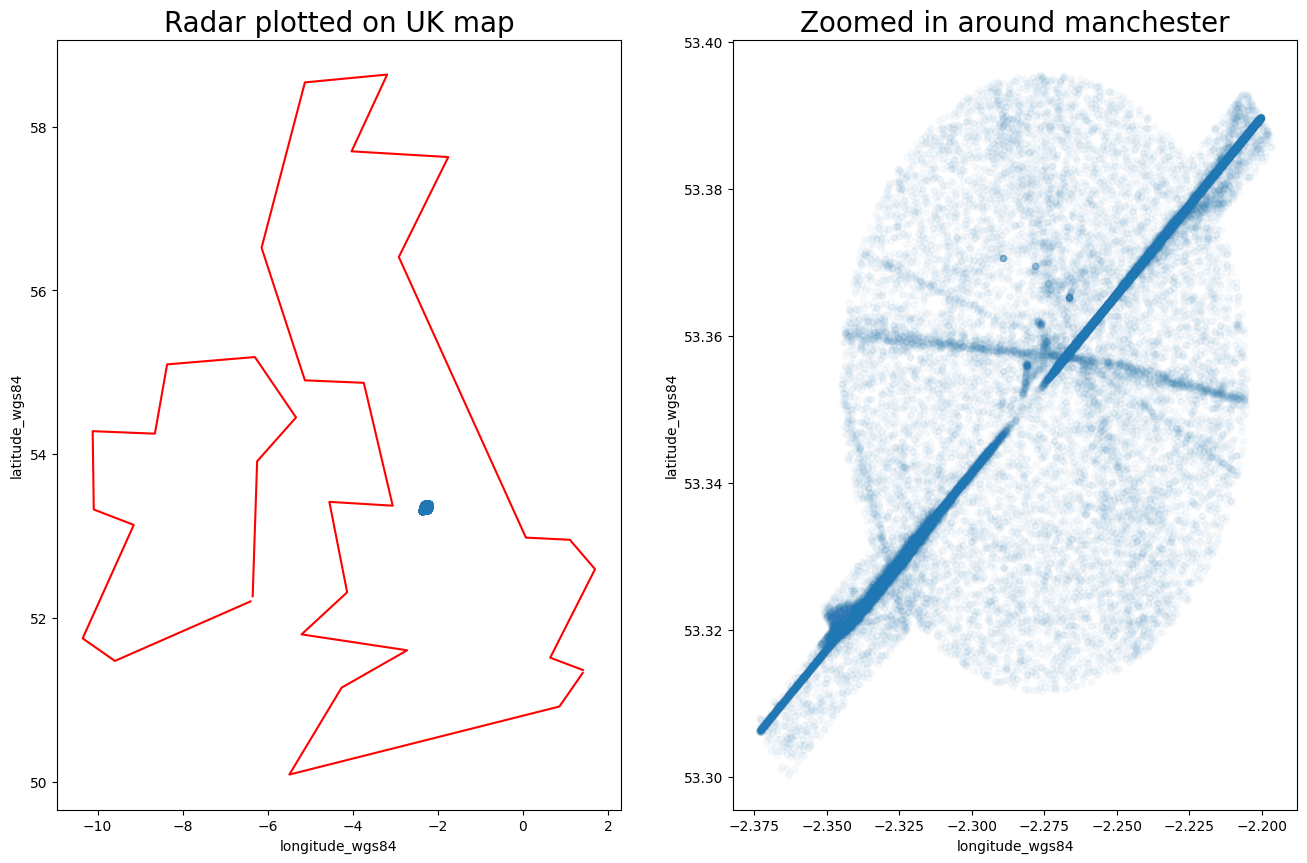

In [3]:
# This cell is to allow a basic map to be plotted with no external depedancies
# beyond vanilla matplotlib

import matplotlib.pyplot as plt

# too many points to plot all of radar, so plot subset
radar_sample = df_rad.sample(50000)

# lat and long of britain and ireland coast
britain_lat_long = [(51.363543, 51.5142059, 52.595033, 52.953926, 52.980394, 56.406601, 57.627711, 57.6975971, 58.634741, 58.539408, 56.519963, 54.900936, 54.870876, 53.3702787, 53.4170238, 52.312878, 51.798736, 51.6044050, 51.14771523879777, 50.086689330887886, 50.917659769488125, 51.327672526999145),(1.4122066086973852, 0.6431636424219397, 1.6978511390282656, 1.1045894221872083, 0.07187458176018299, -2.9164066586244055, -1.7538951106230416, -4.027208509184967,  -3.1910472591392023, -5.124670149870039, -6.143741673363318, -5.124670149870039, -3.7397780794817357, -3.0603970638195532, -4.549809290463574, -4.131728665440687, -5.203060267061828, -2.7207065559884596, -4.262378860760341, -5.490490696765058,  0.8591087957699771, 1.407839616112513)]
ireland_lat_long = [(52.2649292672583, 53.91244970296915, 54.4476722193221, 55.185392432573295, 55.09578242576782, 54.24968373071155, 54.280205597880695, 53.32348226410763, 53.135782409277, 51.750231590843256, 51.47438703951834, 52.20091560724345),(-6.352781985874758, -6.248261829619034, -5.333710462381481, -6.3005219077468935, -8.364794993797382, -8.652225423500614, -10.115507611080703, -10.089377572016774, -9.148696165715286, -10.350677962656079, -9.592906829802102, -6.405042064002617)]

# with and without ufids side by side
fig, ax = plt.subplots(1,2, figsize=(16, 10))


radar_sample.plot.scatter(ax=ax[0], x='longitude_wgs84', y='latitude_wgs84', alpha=.03);

ax[0].plot(britain_lat_long[1], britain_lat_long[0], c='r')
ax[0].plot(ireland_lat_long[1], ireland_lat_long[0], c='r')

ax[0].set_title("Radar plotted on UK map", fontsize=20)

# also plot zoomed in version without uk boundary
radar_sample.plot.scatter(ax=ax[1], x='longitude_wgs84', y='latitude_wgs84', 
                          alpha=.03);
ax[1].set_title("Zoomed in around manchester", fontsize=20)
plt.show()


## Flight Plan Data
Contains flight plan data for each aircraft

Below is a description of the columns.


| **Column** | **Description** |
|--|--|
| fdpid | Flight Data Processing ID |
| callsign | Aircraft designator over radion transmission | 
| start_datetime | datetime of start of flight |
| end_datetime | datetime of end of flight |
| ssr | Secondary Surveillance Radar ("Squawk"), Transponder Octal Code) |
| origin | Origin of Flight (ICAO 4 letter code) |
| dest | Destination of Flight (ICAO 4 letter code) |
| route_fd | flight plan using airways |
| route_grex | flight plan using fixes only |
| scs | TODO |
| actype | Type of Aircraft |
| milcivil | whether a military or civilian flight |
| trackids | Track identification number |
| ufid | the unique id (date-fdpid-callsign) |


**ufid**: is the unique id generated from date-fdpid-callsign to support indexing the dataset, and is present in both the radar and flight plan files, allowing data to be merged.

##### Plot a histogram showing number of flight plans (and hence aircraft) over the year

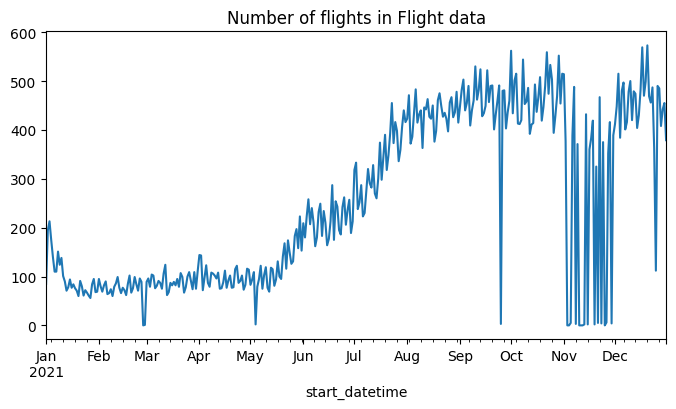

In [4]:
# The temperature throughout the year
df_fl['start_datetime'] = df_fl['start_datetime'].astype('datetime64[s]')
df_fl.set_index('start_datetime').resample('1D').size().plot(title='Number of flights in Flight data', 
                                                             figsize=(8, 4));

## Weather Data

We now have each dataset loaded in a Pandas DataFrame, which consists of rows and columns of data. We can see the first 8 rows and the column titles for the weather data using `df_met.head(8)`

In [5]:
df_met.head(8)

,Unnamed: 0.1,Unnamed: 0,datetime,vert_viz_m,wind_shear,cavok,temp_C,dew_point_C,QNH_hPa,windspeed_kts,wind_dir_deg,wind_rose_dir,wind_minvar_deg,wind_maxvar_deg,base_viz_m,viz_dist_min_m,viz_dir_min_m,cloud_height_layer_0,cloud_quant_layer_0,cloud_type_layer_0,cloud_height_layer_1,cloud_quant_layer_1,cloud_type_layer_1,met_type_0,met_intensity_0,met_descripton_0,met_type_1,met_intensity_1,met_descripton_1,cloud_height_layer_2,cloud_quant_layer_2,cloud_type_layer_2
0,0,0,2021-01-01 00:20:00,NaN,NaN,NaN,0.0,0.0,1009.0,2.0,270.0,W,NaN,NaN,3300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2021-01-01 00:50:00,NaN,NaN,NaN,0.0,0.0,1009.0,3.0,270.0,W,NaN,NaN,1400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,2021-01-01 01:20:00,NaN,NaN,NaN,0.0,0.0,1009.0,3.0,290.0,WNW,NaN,NaN,1700,NaN,NaN,200.0,BKN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,2021-01-01 01:50:00,NaN,NaN,NaN,0.0,0.0,1010.0,2.0,280.0,W,NaN,NaN,2100,NaN,NaN,200.0,BKN,NaN,800.0,BKN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,2021-01-01 02:20:00,NaN,NaN,NaN,0.0,0.0,1010.0,1.0,240.0,WSW,NaN,NaN,1400,NaN,NaN,200.0,BKN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,5,2021-01-01 02:50:00,NaN,NaN,NaN,0.0,0.0,1010.0,1.0,NaN,VRB,NaN,NaN,1400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,6,2021-01-01 03:20:00,NaN,NaN,NaN,0.0,0.0,1010.0,3.0,300.0,WNW,NaN,NaN,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,7,2021-01-01 03:50:00,NaN,NaN,NaN,0.0,0.0,1010.0,2.0,NaN,VRB,NaN,NaN,650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Wind Data Column Definitions

<h4>Basics</h4>
<p><b>datetime </b>: METAR issue datetime timestamp
<p><b>vert_viz_m</b>: Vertical Visibility in meters
<p><b>wind_shear</b>: Is windshear detected?</p>
<p><b>cavok</b>:  bool, CAVOK is a set of conditions which basically say the weather is fine!</p>
<p><b>temp_C</b>: Air temperature in Celcius</p>
<p><b>dew_point_C</b>: Dew air temperature in Celcius
<p><b>QNH_hPA</b>: Ground air pressure in hecto-Pascals 



<h4> Wind </h4>
<p><b>windspeed_kts</b>:  Wind speed in Knots (nautical miles per hour)
<p><b>wind_dir_deg</b>: Wind direction in degrees
<p><b>wind_rose_dir</b>:Compass direction of the wind
<p><b>wind_minvar_deg</b>: Wind veer minimum angle
<p><b>wind_maxvar_deg</b>: Wind veer maximum angle
<p><b>base_viz_m</b>: Visibility in meters

<h4>Cloud</h4>

<p>Cloud is given upto three levels. Each layer, where present
indicates the coverage and the height of the layer.  The type indicator
is...</p>  Coverage is measured in oktas </p>

https://www.metoffice.gov.uk/weather/guides/observations/how-we-measure-cloud


<p><b>cloud_height_layer_[i]</b>: Height of the cloud layer in feet
<p><b>cloud_quant_layer[i]</b>: 
    <t>nan = None 
    <t>SCT = Scattered (0-2 Oktas)
    <t>FEW = a few... (3-4 Oktas)
    <t>BKN = Broken (5-6 Oktas)
    <t>OVC = Overcast (7-8 Oktas)
    
<b>cloud_type_layer_[i]</b>:
<t> TCU = Towering Cumulus
    CB = Cumulonimbus


#### Basic Weather Plotting

We can make some basic plots of the weather data using matplotlib.

##### Temperature throughout the year

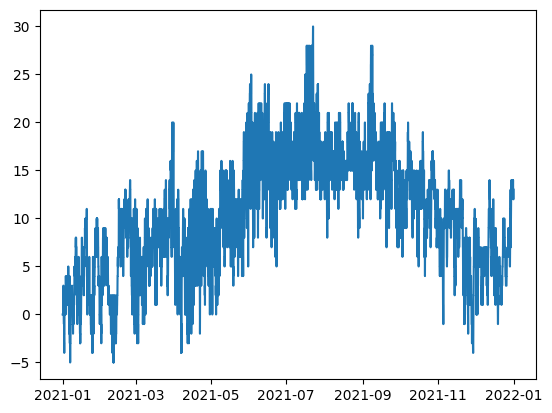

In [6]:
# plot the temperature throughout the year
import matplotlib.pyplot as plt

plt.plot(df_met.datetime.astype('datetime64[s]'),
             df_met.temp_C)

##### Ideas of things to look at as part of project

**Possible ways to approach problem**
- Classify if aircraft are staying overnight or departing same day
- Regression or distribution fitting of short stay. Could use proper ML workflow. (train/test/validation sets)
- Regression or distribution of long stay aircraft.
- Joining ADS-B data with en-route radar data


**Thing to consider**
- Missing data
- consider removing "stale" radar points (mode_s_age_s > 6 seconds): in these cases the position of the aircraft is estimated by the tracker system, as there is no actual position being provided from radar returns.
- impact of weather (wind, cross-winds)
- runway use (which runway, (or both?) is being used. Which direction is the aircraft taking-off/landing (depends on wind))
- aircraft type
- aircraft operator
- flight origin/destination (if flight plan data)
- number of aircraft already at airfield




## ADS-B Ground Data

ADS-B Ground radar from Manchester Airport.

Below is a description of the columns.


| **Column** | **Description** |
|--|--|
| FRN73TMRPDateTimeOfMessageRec | Date and Time of message |
| FRN131HRPWCFloatingPointLat | Latitude in floating point degrees | 
| FRN131HRPWCFloatingPointLong | Longitude in floating point degrees |
| FRN145FLFlightLevel | Flight Level (1 FL = 100 feet) |
| FRN140GHGeometricHeight | Height in feet above ground level |
| FRN170TITargetId | Identification (usually Callsign) of radar object |
| FRN80TATargetAddress | Unique Mode-S identifier |


First few rows:

In [7]:
# display first few rows

df_adsb_full.head

<bound method NDFrame.head of           Unnamed: 0 FRN73TMRPDateTimeOfMessageRec  \
0                  0          01-Jan-2021 00:00:00   
1                  1          01-Jan-2021 00:00:00   
2                  2          01-Jan-2021 00:00:00   
3                  3          01-Jan-2021 00:00:02   
4                  4          01-Jan-2021 00:00:03   
...              ...                           ...   
31226763     3328726          31-Dec-2021 23:59:57   
31226764     3328727          31-Dec-2021 23:59:59   
31226765     3328728          01-Jan-2022 00:00:00   
31226766     3328729          01-Jan-2022 00:00:00   
31226767     3328730          02-Jan-2022 23:59:59   

          FRN131HRPWCFloatingPointLat  FRN131HRPWCFloatingPointLong  \
0                           53.340923                     -2.283293   
1                           53.361794                     -2.283763   
2                           53.366352                     -2.290885   
3                           53.361341

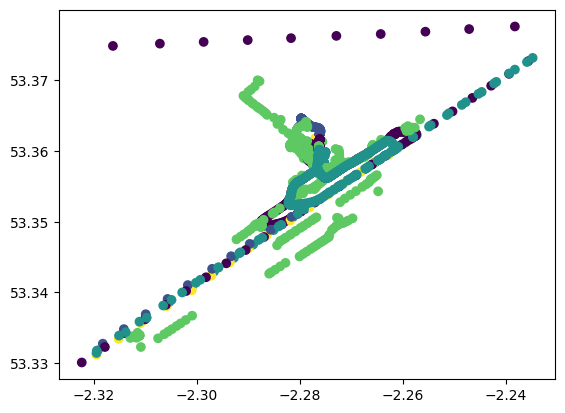

In [8]:
# Make plot of few uniqe aircraft at airport

# Filter to small subset of the data
df = df_adsb_full.iloc[:100000]

# Choose 5 aircraft
all_identifiers = df.FRN80TATargetAddress.unique()
few_identifiers = all_identifiers[10:15]

# filter to these 5 aircraft
df = df[df.FRN80TATargetAddress.isin(few_identifiers)]

# plot
plt.scatter(df.FRN131HRPWCFloatingPointLong, df.FRN131HRPWCFloatingPointLat, 
            c=df.FRN80TATargetAddress.astype('category').cat.codes % 10)